### Basket Analysis FP - Growth

In the era of data science and machine learning, various machine learning concepts are used to make things easier and profitable. When it comes to marketing strategies it becomes very important to learn the behaviour of different customers regarding different products and services. It can be any kind of product or service the provider needs to satisfy the customers to make more and more profits. Machine learning algorithms are now capable of making inferences about consumer behaviour. Using these inferences a provider can indirectly influence any customer to buy more than he wants. 

Arranging items in a supermarket to recommend related products on E-Commerce platforms can affect the profit level for providers and satisfaction level for consumers.

- Association Rule Learning

In machine learning, association rule learning is a method of finding interesting relationships between the variables in a large dataset. This concept is mainly used by supermarkets and multipurpose e-commerce websites. Where it is used for defining the patterns of selling different products. More formally we can say it is useful to extract strong riles from a large database using any measure of interestingness.

In supermarkets, association rules are used for discovering the regularities between the products where the transaction of the products are on a large scale. For example, the rule {comb, hair oil}→{mirror} represents that if a customer is buying comb and hair oil together then there are higher chances that he will buy the mirror also. Such rules can play a major role in marketing strategies.

To extract a set of rules from the database we have various measures of significance and interest. Some of the best-known measures are minimum thresholds on support and confidence.

- Support

Support is a measure that indicates the frequent appearance of a variable set or itemset in a database. Let X be the itemset and T a set of transactions in  then the support of X with respect to T can be measured as 

Basically, the above measure tells the proportion of T transactions in the database which contains the item set X.

- Confidence

Confidence is a measure that indicates how often a rule appears to be true. Let A rule X ⇒ Y with respect to a set of transaction T, is the proportion of the transaction that contains X and Y at the same transaction, where X and Y are itemsets. In terms of support, the confidence of a rule can be defined as 

conf(X⇒Y) = supp(X U Y)／supp(X).

- Frequent Pattern Growth Algorithm

In the FP-Growth algorithm, the algorithm represents the data in a tree structure. It is a lexicographic tree structure that we call the FP-tree. Which is responsible for maintaining the association information between the frequent items. 

After making the FP-Tree, it is segregated into the set of conditional FP-Trees for every frequent item. A set of conditional FP-Trees further can be mined and measured separately.

FP-Growth is Tree-Based algorithm for frequent itemset mining or frequent pattern mining for market basket analysis.

FP Growth generates an FP-Tree for making frequent patterns.

FP-growth generates conditional FP-Tree for every item in the data.

FP-tree requires only one scan of the database in its beginning steps so it consumes less time.

Set of conditional FP-tree for every item is saved in the memory 

It uses a depth-first search.

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing & Cleaning data

In [3]:
df = pd.read_excel(r'C:\Users\SHREE\Downloads\Python CODES\Online Retail Market Basket Analysis Using FP-Growth\Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Checking shape of data

df.shape

(541909, 8)

In [6]:
# Getting more information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(3, 0, 'PARTY BUNTING'),
  Text(4, 0, 'LUNCH BAG RED RETROSPOT'),
  Text(5, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(6, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN'),
  Text(7, 0, 'PACK OF 72 RETROSPOT CAKE CASES'),
  Text(8, 0, 'LUNCH BAG  BLACK SKULL.'),
  Text(9, 0, 'NATURAL SLATE HEART CHALKBOARD')])

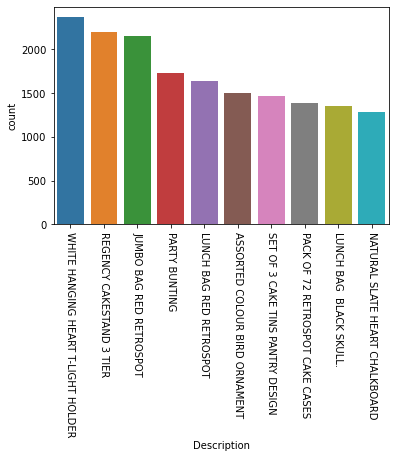

In [8]:
# Plotting 10 descriptions

sns.countplot(x = 'Description', data = df, order = df['Description'].value_counts().iloc[:10].index)
plt.xticks(rotation = -90)

In [7]:
# Cleaning any leading (spaces at the beginning) and trailing (spaces at the end) characters in description & changing invoice 
#no column data type to string

df['Description'] = df['Description'].str.strip()
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

Creating Basket DataFrame of Data

In [10]:
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


One-Hot Encoding data basket

In [22]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket_sets = basket.applymap(encode_units)
basket_sets.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Setting Parameters For FP - Growth Algorithm

In [23]:
minTransaction = 300
totalTransactions = len(basket_sets.index)
min_support_calc = minTransaction/totalTransactions

print('Number of Baskets for Analysis is :', totalTransactions)
print('Minimum Support Value is :', round(min_support_calc*100, 4), '%')

Number of Baskets for Analysis is : 24445
Minimum Support Value is : 1.2272 %


In [24]:
# Creating frequent itemsets

frequent_itemsets = fpgrowth(basket_sets, min_support = min_support_calc, use_colnames = True)
frequent_itemsets.describe()

,support
count,712.000000
mean,0.020096
std,0.009659
min,0.012272
25%,0.014072
50%,0.016854
75%,0.022060
max,0.092452


Creating Association Rules

In [25]:
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
478,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",(GREEN REGENCY TEACUP AND SAUCER),0.013541,0.041522,0.012313,0.909366,21.900927,0.011751,10.575210
491,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.024504,0.041522,0.022172,0.904841,21.791969,0.021155,10.072429
476,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",(ROSES REGENCY TEACUP AND SAUCER),0.014031,0.043608,0.012313,0.877551,20.123579,0.011701,7.810534
465,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",(GREEN REGENCY TEACUP AND SAUCER),0.016036,0.041522,0.014031,0.875000,21.073276,0.013366,7.667826
120,"(CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...",(RED RETROSPOT CHARLOTTE BAG),0.015504,0.042299,0.013336,0.860158,20.335174,0.012680,6.848465
490,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.025895,0.043608,0.022172,0.856240,19.634887,0.021043,6.652704
470,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",(ROSES REGENCY TEACUP AND SAUCER),0.016036,0.043608,0.013541,0.844388,19.363094,0.012841,6.145994
593,(REGENCY TEA PLATE GREEN),(REGENCY TEA PLATE ROSES),0.015586,0.018204,0.013050,0.837270,45.993424,0.012766,6.033294
458,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.031336,0.041522,0.025895,0.826371,19.902102,0.024594,5.520258
417,"(CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...",(RED RETROSPOT CHARLOTTE BAG),0.016159,0.042299,0.013295,0.822785,19.451620,0.012612,5.404170


Creating a Excel Sheet for Output

In [27]:
rules[(rules['lift'] >= 1.4) & (rules['confidence'] >= 0.3)].sort_values(by = ['confidence', 'lift'], ascending = False).to_excel(r'C:\Users\SHREE\Downloads\Python CODES\Online Retail Market Basket Analysis Using FP-Growth\Online_Retail_Results_FPGrowth.xlsx', index = False)